CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of data:
          x     CCA     ICA
0  0.000000  3.6864  3.1759
1  0.000154  3.6899  3.1758
2  0.008203  3.8828  3.2100
3  0.015236  4.1119  3.3705
4  0.016030  4.1484  3.3919
Plot saved as 'velocity_profile_plot.png'


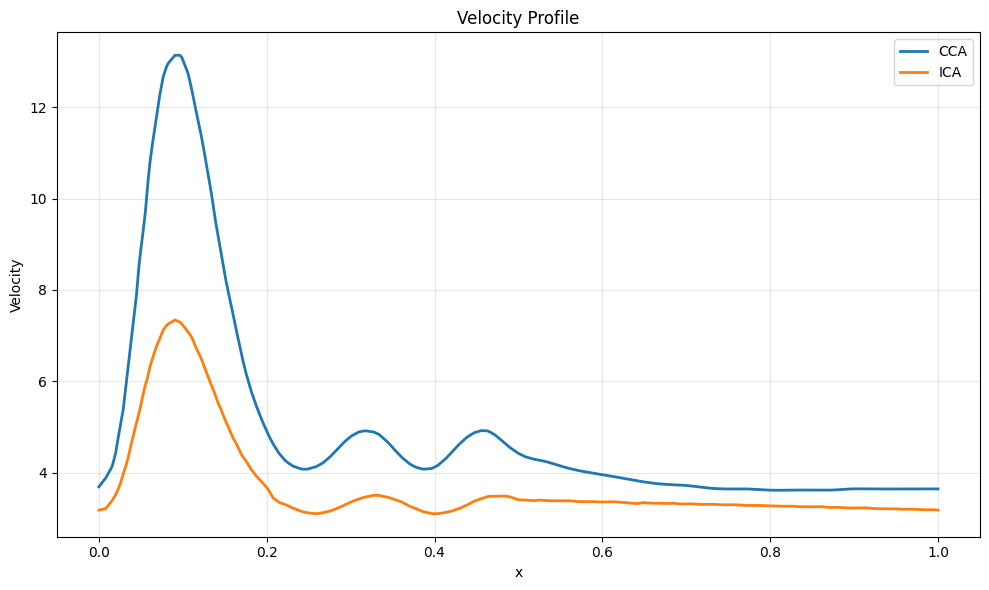

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_velocity_profile(csv_path):
    """
    Extract and plot data from a CSV file containing velocity profiles.
    
    Parameters:
        csv_path: Path to the CSV file
    """
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return

    # Try to load the CSV with different delimiters
    try:
        # First try comma delimiter
        df = pd.read_csv(csv_path)
    except:
        try:
            # Try semicolon delimiter (common in some regions)
            df = pd.read_csv(csv_path, sep=';')
        except:
            try:
                # Try tab delimiter
                df = pd.read_csv(csv_path, sep='\t')
            except Exception as e:
                print(f"Error loading CSV: {e}")
                return

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Determine x and y columns
    if len(df.columns) >= 2:
        x_col = df.columns[0]  # Usually first column is time/position
        
        # Plot all other columns as different velocity profiles
        for i, col in enumerate(df.columns[1:]):
            plt.plot(df[x_col], df[col], label=col, linewidth=2)
            
        plt.xlabel(x_col)
        plt.ylabel('Velocity')
    else:
        # If only one column, plot it against index
        plt.plot(df.iloc[:, 0], label=df.columns[0])
        plt.xlabel('Index')
        plt.ylabel(df.columns[0])

    plt.title('Velocity Profile')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Save the plot
    output_path = 'velocity_profile_plot.png'
    plt.savefig(output_path, dpi=300)
    print(f"Plot saved as '{output_path}'")
    
    plt.tight_layout()
    plt.show()

# Path to the CSV file
csv_file = "Velocity profile.csv"
normalised_csv_file = "velocity_profile_normalized.csv"

# Generate the plot
plot_velocity_profile(normalised_csv_file)

CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of original data:
          x     CCA     ICA
0  0.000063  3.6864  3.1759
1  0.000217  3.6899  3.1758
2  0.008274  3.8828  3.2100
3  0.015313  4.1119  3.3705
4  0.016108  4.1484  3.3919
Plot saved as 'velocity_profile_normalized.png'


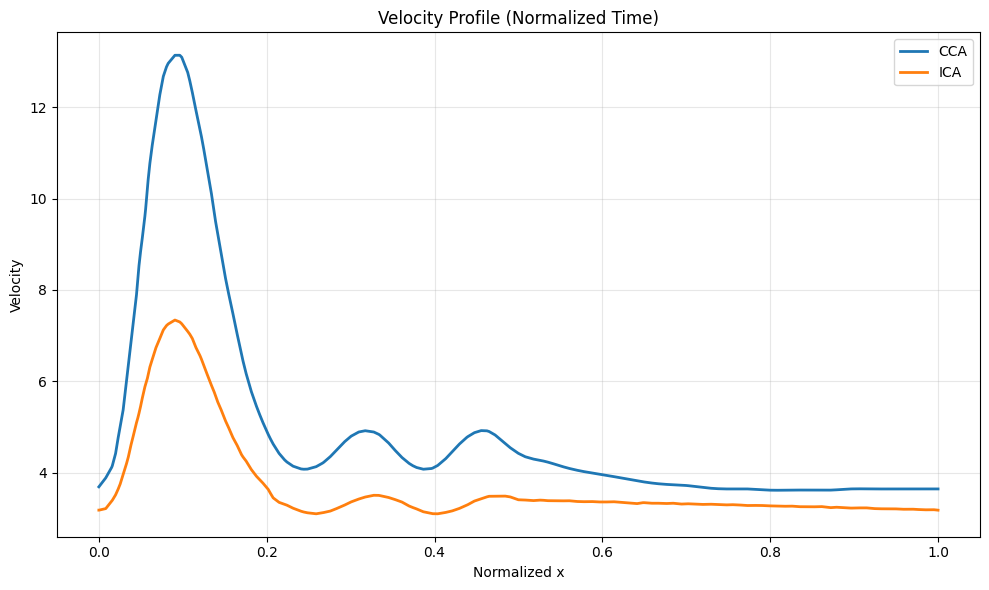


First 5 rows of normalized data:
          x     CCA     ICA
0  0.000000  3.6864  3.1759
1  0.000154  3.6899  3.1758
2  0.008203  3.8828  3.2100
3  0.015236  4.1119  3.3705
4  0.016030  4.1484  3.3919
Normalized data saved to 'velocity_profile_normalized.csv'


In [7]:
def resize_plot(csv_path, output_csv_path=None):
    """
    Resize the plot to between 0 and 1 for the x-axis and save normalized coordinates.
    
    Parameters:
        csv_path: Path to the CSV file
        output_csv_path: Path where to save the normalized CSV (default: 'velocity_profile_normalized.csv')
    
    Returns:
        DataFrame with normalized coordinates
    """
    # Set default output path if not provided
    if output_csv_path is None:
        output_csv_path = 'velocity_profile_normalized.csv'
    
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return None

    # Try to load the CSV with different delimiters
    try:
        for delimiter in [',', ';', '\t']:
            try:
                df = pd.read_csv(csv_path, sep=delimiter)
                break
            except:
                continue
        else:
            raise ValueError(f"Could not parse CSV with any delimiter")
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return None

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of original data:")
    print(df.head())

    # Create normalized dataframe
    df_normalized = df.copy()
    
    # Normalize x-axis (first column) to [0,1]
    x_col = df.columns[0]
    x_min, x_max = df[x_col].min(), df[x_col].max()
    df_normalized[x_col] = (df[x_col] - x_min) / (x_max - x_min)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Determine x and y columns
    if len(df.columns) >= 2:
        # Plot all y columns as different velocity profiles
        for i, col in enumerate(df.columns[1:]):
            plt.plot(df_normalized[x_col], df[col], label=col, linewidth=2)
            
        plt.xlabel(f"Normalized {x_col}")
        plt.ylabel('Velocity')
    else:
        # If only one column, plot it against index
        plt.plot(df_normalized[x_col], label=df.columns[0])
        plt.xlabel(f"Normalized {x_col}")
        plt.ylabel(df.columns[0])

    plt.title('Velocity Profile (Normalized Time)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Save the plot
    output_plot_path = 'velocity_profile_normalized.png'
    plt.savefig(output_plot_path, dpi=300)
    print(f"Plot saved as '{output_plot_path}'")
    
    plt.tight_layout()
    plt.show()
    
    # Show the normalized data
    print("\nFirst 5 rows of normalized data:")
    print(df_normalized.head())
    
    # Save normalized data to CSV
    df_normalized.to_csv(output_csv_path, index=False)
    print(f"Normalized data saved to '{output_csv_path}'")
    
    return df_normalized

# Call the function with your CSV file
csv_file = "Velocity profile.csv"
normalized_df = resize_plot(csv_file)

CSV loaded successfully from Velocity profile.csv
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)


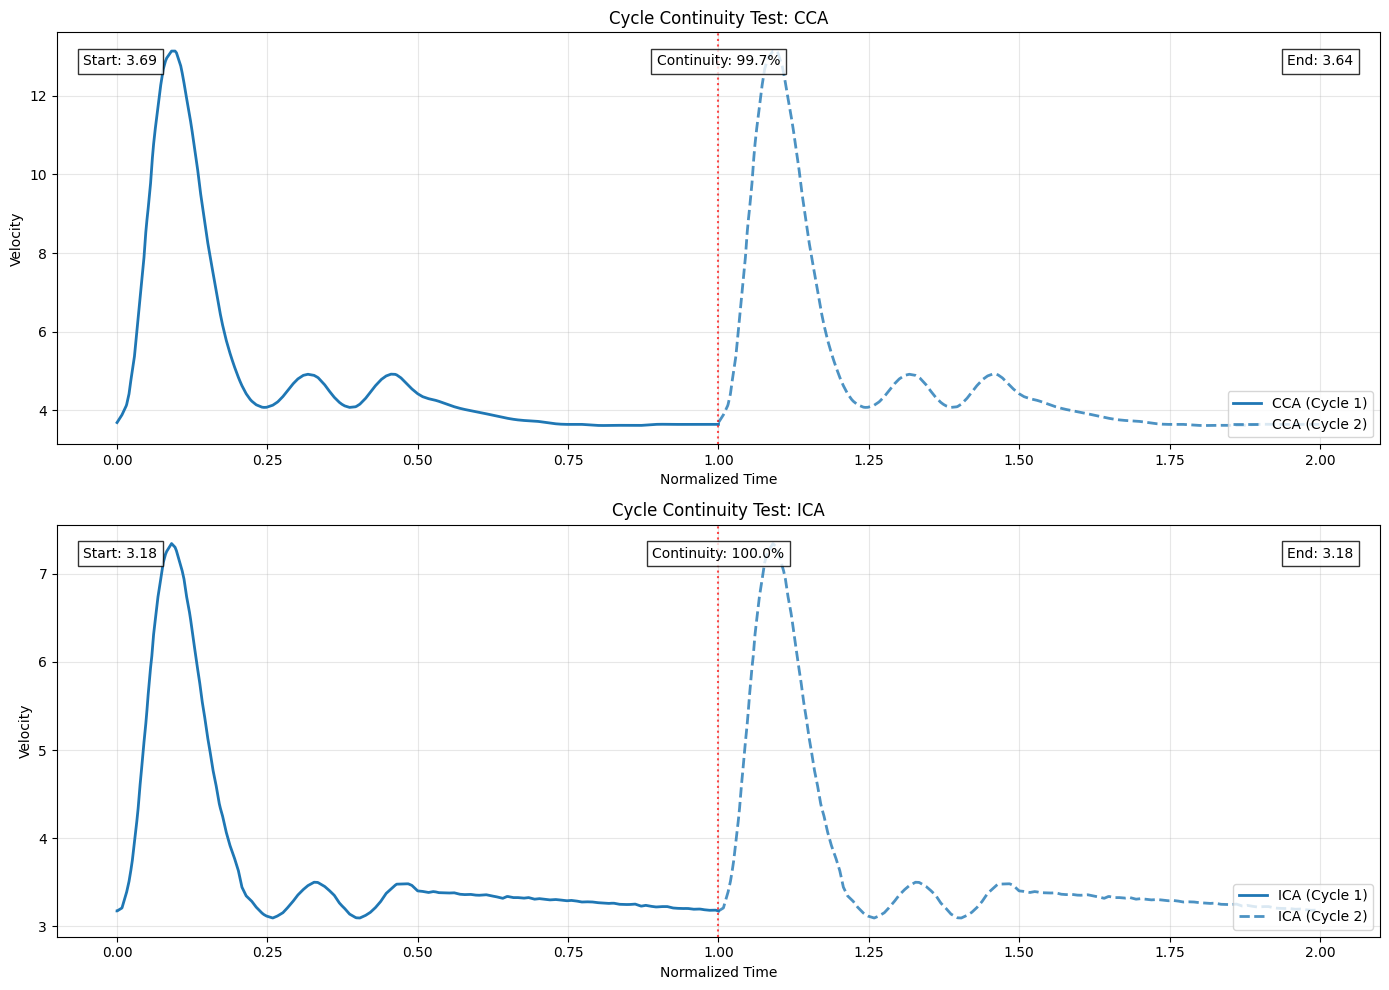

,x,CCA,ICA
0,0.000063,3.6864,3.1759
1,0.000217,3.6899,3.1758
2,0.008274,3.8828,3.2100
3,0.015313,4.1119,3.3705
4,0.016108,4.1484,3.3919
...,...,...,...
196,0.977708,3.6405,3.1895
197,0.986466,3.6405,3.1835
198,0.995380,3.6405,3.1855
199,0.996182,3.6406,3.1851


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def test_cyclic_profiles(csv_path, columns=None):
    """
    Test if velocity profiles form continuous cycles by plotting
    two copies side by side for both CCA and ICA.
    
    Parameters:
        csv_path: Path to CSV file with velocity data
        columns: List of column names to test for cyclicity (if None, uses all y columns)
    """
    # Load CSV
    try:
        for delimiter in [',', ';', '\t']:
            try:
                df = pd.read_csv(csv_path, sep=delimiter)
                break
            except:
                continue
        else:
            raise ValueError(f"Could not parse CSV with any delimiter")
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return
    
    print(f"CSV loaded successfully from {csv_path}")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Determine columns to plot
    x_col = df.columns[0]  # First column as x-axis (time)
    if columns is None:
        # Use all columns except the first (x-axis)
        y_cols = df.columns[1:]
    else:
        y_cols = columns
    
    # Create plot with subplots for each profile
    fig, axs = plt.subplots(len(y_cols), 1, figsize=(14, 5*len(y_cols)))
    if len(y_cols) == 1:
        axs = [axs]  # Make iterable for single subplot
        
    colors = ['#1f77b4', '#ff7f0e']
        
    # Process each column and plot two cycles side by side
    for i, y_col in enumerate(y_cols):
        # Extract data
        x_data = df[x_col].values
        y_data = df[y_col].values
        
        # Normalize x to [0,1]
        x_min, x_max = np.min(x_data), np.max(x_data)
        x_norm = (x_data - x_min) / (x_max - x_min)
        
        # Create two copies of the data
        x_cycle1 = x_norm
        x_cycle2 = x_norm + 1.0  # Second copy starts at 1.0
        
        # Plot first cycle
        axs[i].plot(x_cycle1, y_data, label=f"{y_col} (Cycle 1)", 
                 color=colors[0], linewidth=2)
        
        # Plot second cycle
        axs[i].plot(x_cycle2, y_data, label=f"{y_col} (Cycle 2)", 
                 color=colors[0], linestyle='--', linewidth=2, alpha=0.8)
        
        # Add transition line
        axs[i].axvline(x=1.0, color='red', linestyle=':', alpha=0.7)
        
        # Calculate continuity at transition point
        start_value = y_data[0]
        end_value = y_data[-1]
        discontinuity = abs(end_value - start_value)
        continuity_pct = 100 * (1 - discontinuity / np.max(np.abs(y_data)))
        
        # Add annotations
        axs[i].annotate(f"Start: {start_value:.2f}", xy=(0.02, 0.92), 
                      xycoords='axes fraction', fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.8))
        
        axs[i].annotate(f"End: {end_value:.2f}", xy=(0.98, 0.92), 
                      xycoords='axes fraction', ha='right', fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.8))
                      
        axs[i].annotate(f"Continuity: {continuity_pct:.1f}%", xy=(0.5, 0.92), 
                      xycoords='axes fraction', ha='center', fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.8))
        
        # Set title and labels
        axs[i].set_title(f'Cycle Continuity Test: {y_col}')
        axs[i].set_xlabel('Normalized Time')
        axs[i].set_ylabel('Velocity')
        axs[i].grid(True, alpha=0.3)
        axs[i].legend(loc='lower right')
        
    plt.tight_layout()
    plt.savefig('cycle_continuity_test.png', dpi=300)
    plt.show()
    
    return df

# Call the function with your CSV
csv_file = "Velocity profile.csv"

# Test all velocity profiles in the CSV
test_cyclic_profiles(csv_file)

# If needed, test specific columns
# test_cyclic_profiles(csv_file, columns=["CCA", "ICA"])

In [ ]:
# Take the FFT of this data and plot it
def plot_fft(csv_path):
    """
    Extract and plot data from a CSV file containing velocity profiles.
    
    Parameters:
        csv_path: Path to the CSV file
    """
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return

    # Try to load the CSV with different delimiters
    try:
        # First try comma delimiter
        df = pd.read_csv(csv_path)
    except:
        try:
            # Try semicolon delimiter (common in some regions)
            df = pd.read_csv(csv_path, sep=';')
        except:
            try:
                # Try tab delimiter
                df = pd.read_csv(csv_path, sep='\t')
            except Exception as e:
                print(f"Error loading CSV: {e}")
                return

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Determine x and y columns
    if len(df.columns) >= 2:
        x_col = df.columns[0]  # Usually first column is time/position
        
        # Plot all other columns as different velocity profiles
        for i, col in enumerate(df.columns[1:]):
            # Take the FFT of the data
            fft_vals = np.abs(np.fft.fft(df[col]))
            freqs = np.fft.fftfreq(len(fft_vals))
            


plot_fft(csv_file)

CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of data:
          x     CCA     ICA
0  0.000063  3.6864  3.1759
1  0.000217  3.6899  3.1758
2  0.008274  3.8828  3.2100
3  0.015313  4.1119  3.3705
4  0.016108  4.1484  3.3919


<Figure size 1000x600 with 0 Axes>

CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of data:
          x     CCA     ICA
0  0.000063  3.6864  3.1759
1  0.000217  3.6899  3.1758
2  0.008274  3.8828  3.2100
3  0.015313  4.1119  3.3705
4  0.016108  4.1484  3.3919
Time step (dt): 0.000154 seconds
Sampling frequency: 6493.51 Hz

Top 5 frequency components for CCA:
  258.448 Hz (period: 0.004 s), magnitude: 0.10515
  323.060 Hz (period: 0.003 s), magnitude: 0.04402
  419.978 Hz (period: 0.002 s), magnitude: 0.01579

Top 5 frequency components for ICA:
  226.142 Hz (period: 0.004 s), magnitude: 0.04528
  323.060 Hz (period: 0.003 s), magnitude: 0.02163
  419.978 Hz (period: 0.002 s), magnitude: 0.00998


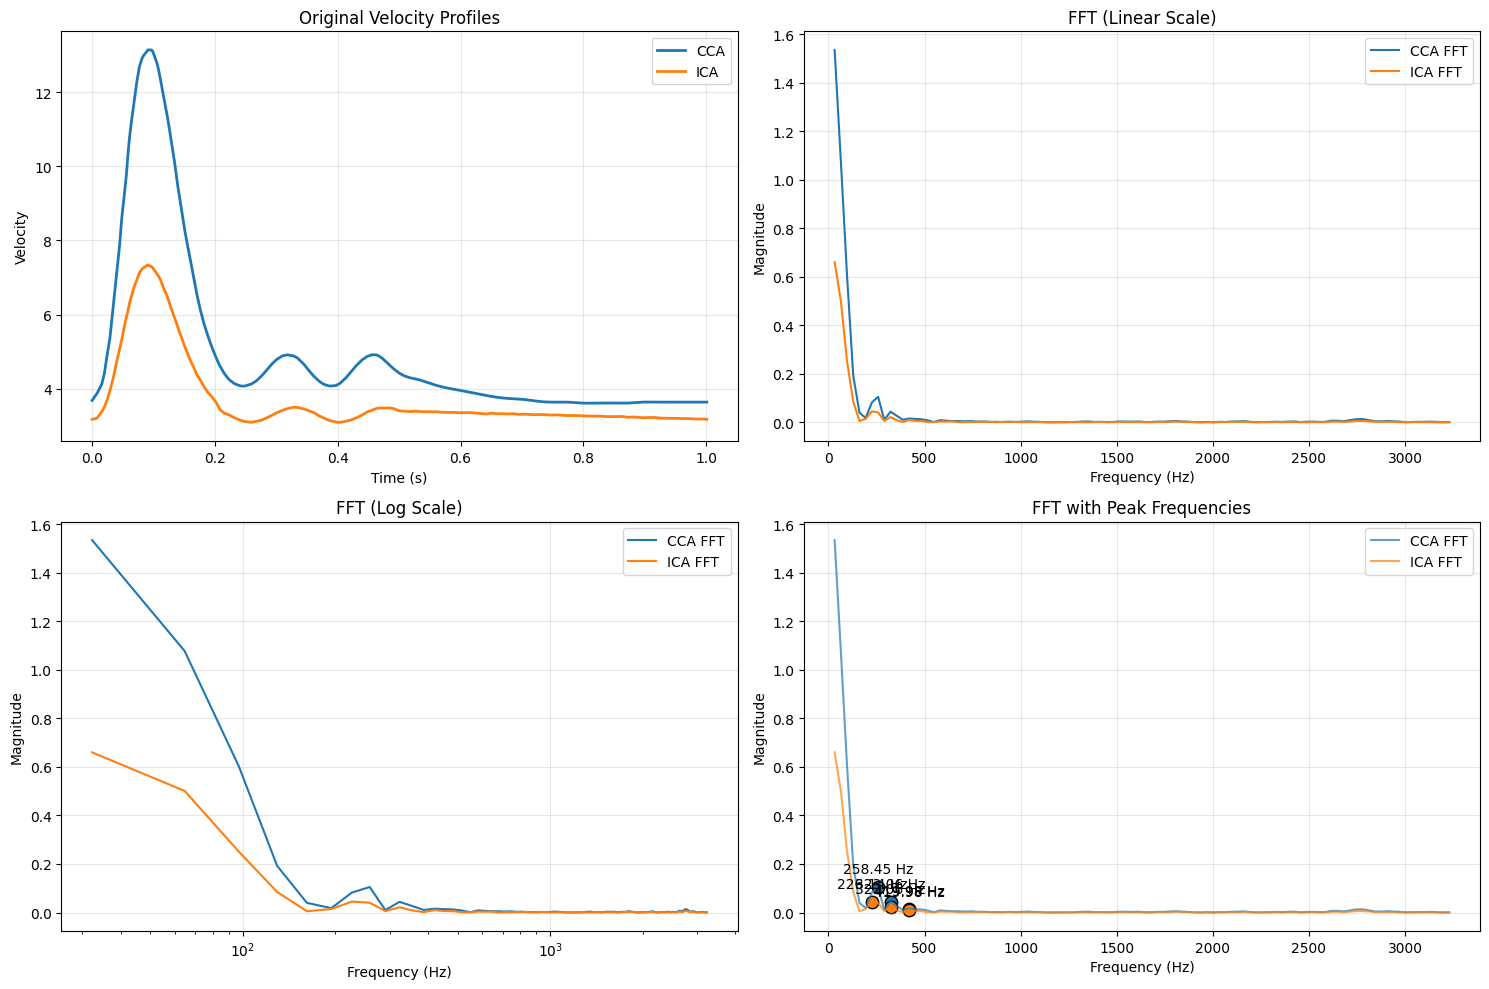

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_fft(csv_path):
    """
    Extract data from a CSV file and plot the FFT of velocity profiles.
    
    Parameters:
        csv_path: Path to the CSV file
    """
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return

    # Try to load the CSV with different delimiters
    try:
        # First try comma delimiter
        df = pd.read_csv(csv_path)
    except:
        try:
            # Try semicolon delimiter (common in some regions)
            df = pd.read_csv(csv_path, sep=';')
        except:
            try:
                # Try tab delimiter
                df = pd.read_csv(csv_path, sep='\t')
            except Exception as e:
                print(f"Error loading CSV: {e}")
                return

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Extract time data
    x_col = df.columns[0]  # Time column
    
    # Calculate time step from the first two time points
    dt = df[x_col].iloc[1] - df[x_col].iloc[0]
    print(f"Time step (dt): {dt:.6f} seconds")
    
    # Calculate sampling frequency
    fs = 1/dt
    print(f"Sampling frequency: {fs:.2f} Hz")
    
    # Create figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot original data
    axs[0, 0].set_title('Original Velocity Profiles')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Velocity')
    axs[0, 0].grid(True, alpha=0.3)
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    
    # Plot FFTs
    for i, col in enumerate(df.columns[1:]):
        # Original data
        axs[0, 0].plot(df[x_col], df[col], label=col, color=colors[i], linewidth=2)
        
        # Calculate FFT
        N = len(df[col])
        fft_vals = np.abs(np.fft.fft(df[col])) / N  # Normalize by N
        
        # Get frequency array
        freqs = np.fft.fftfreq(N, dt)
        
        # Find positive frequencies only
        positive_freq_idx = np.where(freqs > 0)
        freqs_pos = freqs[positive_freq_idx]
        fft_pos = fft_vals[positive_freq_idx]
        
        # Plot linear FFT
        axs[0, 1].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i])
        axs[0, 1].set_title('FFT (Linear Scale)')
        axs[0, 1].set_xlabel('Frequency (Hz)')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].grid(True, alpha=0.3)
        
        # Plot log scale FFT
        axs[1, 0].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i])
        axs[1, 0].set_title('FFT (Log Scale)')
        axs[1, 0].set_xlabel('Frequency (Hz)')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xscale('log')
        axs[1, 0].grid(True, alpha=0.3)
        
        # Find dominant frequency components (peaks)
        peak_indices = find_peaks(fft_pos, height=0.01*np.max(fft_pos))[0]
        peak_freqs = freqs_pos[peak_indices]
        peak_mags = fft_pos[peak_indices]
        
        # Print top 5 frequency components
        sorted_idx = np.argsort(peak_mags)[::-1][:5]  # Top 5 peaks
        print(f"\nTop 5 frequency components for {col}:")
        for j in sorted_idx:
            freq = peak_freqs[j]
            mag = peak_mags[j]
            period = 1/freq if freq > 0 else np.inf
            print(f"  {freq:.3f} Hz (period: {period:.3f} s), magnitude: {mag:.5f}")
        
        # Plot with peaks annotated
        axs[1, 1].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i], alpha=0.7)
        axs[1, 1].scatter(peak_freqs[sorted_idx[:3]], peak_mags[sorted_idx[:3]], 
                         color=colors[i], marker='o', s=80, edgecolor='black')
        
        # Annotate top 3 peaks
        for j in sorted_idx[:3]:
            axs[1, 1].annotate(f"{peak_freqs[j]:.2f} Hz",
                              (peak_freqs[j], peak_mags[j]),
                              textcoords="offset points",
                              xytext=(0,10), 
                              ha='center')
    
    axs[1, 1].set_title('FFT with Peak Frequencies')
    axs[1, 1].set_xlabel('Frequency (Hz)')
    axs[1, 1].set_ylabel('Magnitude')
    axs[1, 1].grid(True, alpha=0.3)
    
    # Add legends to all subplots
    for ax in axs.flat:
        ax.legend()
    
    plt.tight_layout()
    plt.savefig('velocity_profile_fft_analysis.png', dpi=300)
    plt.show()
    
    return df  # Return the dataframe for further analysis

# Make sure to import the necessary package for peak detection
from scipy.signal import find_peaks

# Path to the CSV file
csv_file = "Velocity profile.csv"

# Generate the plot
df = plot_fft(csv_file)

CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of data:
          x     CCA     ICA
0  0.000063  3.6864  3.1759
1  0.000217  3.6899  3.1758
2  0.008274  3.8828  3.2100
3  0.015313  4.1119  3.3705
4  0.016108  4.1484  3.3919
Time step (dt): 0.000154 seconds
Sampling frequency: 6493.51 Hz

Top 3 frequency components for CCA:
  258.448 Hz (period: 0.004 s), magnitude: 0.10515
  323.060 Hz (period: 0.003 s), magnitude: 0.04402
  419.978 Hz (period: 0.002 s), magnitude: 0.01579
(201,)

Top 3 frequency components for ICA:
  226.142 Hz (period: 0.004 s), magnitude: 0.04528
  323.060 Hz (period: 0.003 s), magnitude: 0.02163
  419.978 Hz (period: 0.002 s), magnitude: 0.00998
(201,)


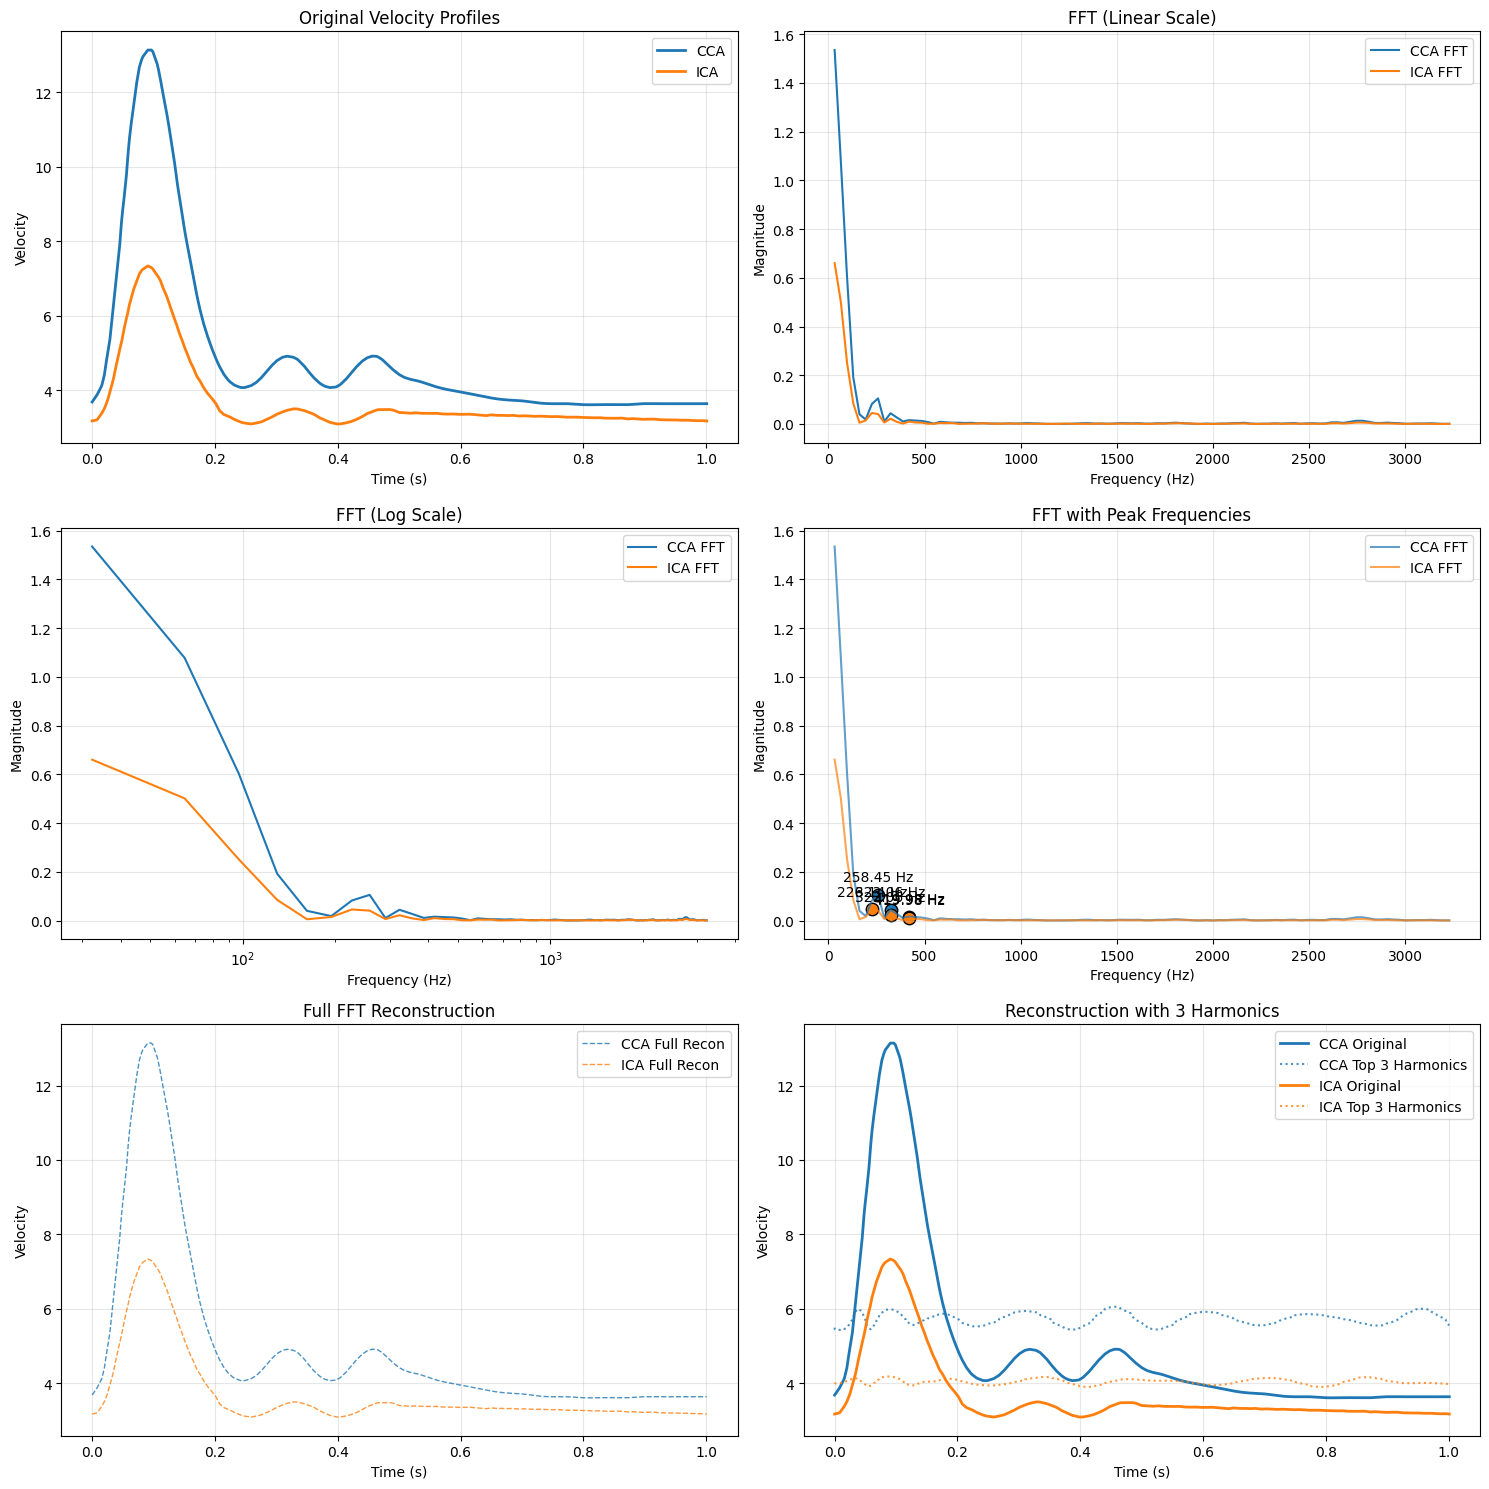

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

def plot_fft_with_reconstruction(csv_path, num_harmonics=5):
    """
    Extract data from a CSV file, plot the FFT, and reconstruct the original signal.
    
    Parameters:
        csv_path: Path to the CSV file
        num_harmonics: Number of harmonics to use for reconstruction
    """
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return

    # Try to load the CSV with different delimiters
    try:
        # First try comma delimiter
        df = pd.read_csv(csv_path)
    except:
        try:
            # Try semicolon delimiter (common in some regions)
            df = pd.read_csv(csv_path, sep=';')
        except:
            try:
                # Try tab delimiter
                df = pd.read_csv(csv_path, sep='\t')
            except Exception as e:
                print(f"Error loading CSV: {e}")
                return

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Extract time data
    x_col = df.columns[0]  # Time column
    
    # Calculate time step from the first two time points
    dt = df[x_col].iloc[1] - df[x_col].iloc[0]
    print(f"Time step (dt): {dt:.6f} seconds")
    
    # Calculate sampling frequency
    fs = 1/dt
    print(f"Sampling frequency: {fs:.2f} Hz")
    
    # Create figure with subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    
    # Plot original data
    axs[0, 0].set_title('Original Velocity Profiles')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Velocity')
    axs[0, 0].grid(True, alpha=0.3)
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    reconstructed_signals = {}
    
    # Plot FFTs
    for i, col in enumerate(df.columns[1:]):
        # Original data
        axs[0, 0].plot(df[x_col], df[col], label=col, color=colors[i], linewidth=2)
        
        # Calculate FFT
        N = len(df[col])
        fft_complex = np.fft.fft(df[col])  # Keep complex values for reconstruction
        fft_vals = np.abs(fft_complex) / N  # Normalize by N
        
        # Get frequency array
        freqs = np.fft.fftfreq(N, dt)
        
        # Find positive frequencies only
        positive_freq_idx = np.where(freqs > 0)
        freqs_pos = freqs[positive_freq_idx]
        fft_pos = fft_vals[positive_freq_idx]
        
        # Plot linear FFT
        axs[0, 1].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i])
        axs[0, 1].set_title('FFT (Linear Scale)')
        axs[0, 1].set_xlabel('Frequency (Hz)')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].grid(True, alpha=0.3)
        
        # Plot log scale FFT
        axs[1, 0].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i])
        axs[1, 0].set_title('FFT (Log Scale)')
        axs[1, 0].set_xlabel('Frequency (Hz)')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xscale('log')
        axs[1, 0].grid(True, alpha=0.3)
        
        # Find dominant frequency components (peaks)
        peak_indices = find_peaks(fft_pos, height=0.01*np.max(fft_pos))[0]
        peak_freqs = freqs_pos[peak_indices]
        peak_mags = fft_pos[peak_indices]
        
        # Print top frequency components
        sorted_idx = np.argsort(peak_mags)[::-1]  # Sort by magnitude
        print(f"\nTop {min(len(sorted_idx), num_harmonics)} frequency components for {col}:")
        for j in sorted_idx[:num_harmonics]:
            freq = peak_freqs[j]
            mag = peak_mags[j]
            period = 1/freq if freq > 0 else np.inf
            print(f"  {freq:.3f} Hz (period: {period:.3f} s), magnitude: {mag:.5f}")
        
        # Plot with peaks annotated
        axs[1, 1].plot(freqs_pos, fft_pos, label=f"{col} FFT", color=colors[i], alpha=0.7)
        axs[1, 1].scatter(peak_freqs[sorted_idx[:3]], peak_mags[sorted_idx[:3]], 
                         color=colors[i], marker='o', s=80, edgecolor='black')
        
        # Annotate top 3 peaks
        for j in sorted_idx[:3]:
            axs[1, 1].annotate(f"{peak_freqs[j]:.2f} Hz",
                              (peak_freqs[j], peak_mags[j]),
                              textcoords="offset points",
                              xytext=(0,10), 
                              ha='center')
        
        # ====== SIGNAL RECONSTRUCTION USING FFT ======
        # Method 1: Full reconstruction (using all frequency components)
        full_reconstruction = np.real(np.fft.ifft(fft_complex))
        print(full_reconstruction.shape)
        
        # Method 2: Reconstruction using only the top harmonics
        # Create a filtered FFT with only the significant components
        filtered_fft = np.zeros_like(fft_complex, dtype=complex)
        
        # Get indices of top harmonics in the full FFT array (both positive and negative frequencies)
        top_peak_indices = []
        for j in sorted_idx[:num_harmonics]:
            # Find the index in the original frequency array
            freq = peak_freqs[j]
            idx = np.argmin(np.abs(freqs - freq))
            top_peak_indices.append(idx)
            
            # Also include negative frequency counterpart
            neg_idx = np.argmin(np.abs(freqs + freq))
            if neg_idx != idx:  # Avoid adding DC component twice
                top_peak_indices.append(neg_idx)
        
        # Always include the DC component (mean value)
        dc_idx = np.argmin(np.abs(freqs))
        if dc_idx not in top_peak_indices:
            top_peak_indices.append(dc_idx)
        
        # Keep only the top harmonics
        for idx in top_peak_indices:
            filtered_fft[idx] = fft_complex[idx]
        
        harmonic_reconstruction = np.real(np.fft.ifft(filtered_fft))
        
        # Store the reconstructed signals
        reconstructed_signals[col] = {
            'full': full_reconstruction,
            'harmonic': harmonic_reconstruction
        }
        
        # Plot reconstructions
        # axs[2, 0].plot(df[x_col], df[col], label=f"{col} Original", 
        #              color=colors[i], linestyle='-', linewidth=2)
        axs[2, 0].plot(df[x_col], full_reconstruction, label=f"{col} Full Recon", 
                     color=colors[i], linestyle='--', linewidth=1"\nReconstruction error for {col}: {np.linalg.norm(df[col] - full_reconstruction):.6f}"), alpha=0.8)
        axs[2, 0].set_title('Full FFT Reconstruction')
        axs[2, 0].set_xlabel('Time (s)')
        axs[2, 0].set_ylabel('Velocity')
        axs[2, 0].grid(True, alpha=0.3)
        
        axs[2, 1].plot(df[x_col], df[col], label=f"{col} Original", 
                     color=colors[i], linestyle='-', linewidth=2)
        axs[2, 1].plot(df[x_col], harmonic_reconstruction, label=f"{col} Top {num_harmonics} Harmonics", 
                     color=colors[i], linestyle=':', linewidth=1.5, alpha=0.8)
        axs[2, 1].set_title(f'Reconstruction with {num_harmonics} Harmonics')
        axs[2, 1].set_xlabel('Time (s)')
        axs[2, 1].set_ylabel('Velocity')
        axs[2, 1].grid(True, alpha=0.3)
    
    axs[1, 1].set_title('FFT with Peak Frequencies')
    axs[1, 1].set_xlabel('Frequency (Hz)')
    axs[1, 1].set_ylabel('Magnitude')
    axs[1, 1].grid(True, alpha=0.3)
    
    # Add legends to all subplots
    for ax in axs.flat:
        ax.legend()
    
    plt.tight_layout()
    plt.savefig('velocity_profile_fft_analysis_with_reconstruction.png', dpi=300)
    plt.show()
    
    return df, reconstructed_signals

# Path to the CSV file
csv_file = "Velocity profile.csv"

# Generate the plot with signal reconstruction
df, reconstructed_signals = plot_fft_with_reconstruction(csv_file, num_harmonics=3)

CSV data loaded successfully.
Columns found: ['x', 'CCA', 'ICA']
Data shape: (201, 3)

First 5 rows of data:
          x     CCA     ICA
0  0.000063  3.6864  3.1759
1  0.000217  3.6899  3.1758
2  0.008274  3.8828  3.2100
3  0.015313  4.1119  3.3705
4  0.016108  4.1484  3.3919
Time step (dt): 0.000154 seconds
Sampling frequency: 6493.51 Hz
CCA: 2 harmonics needed for 95% energy reconstruction
ICA: 1 harmonics needed for 95% energy reconstruction


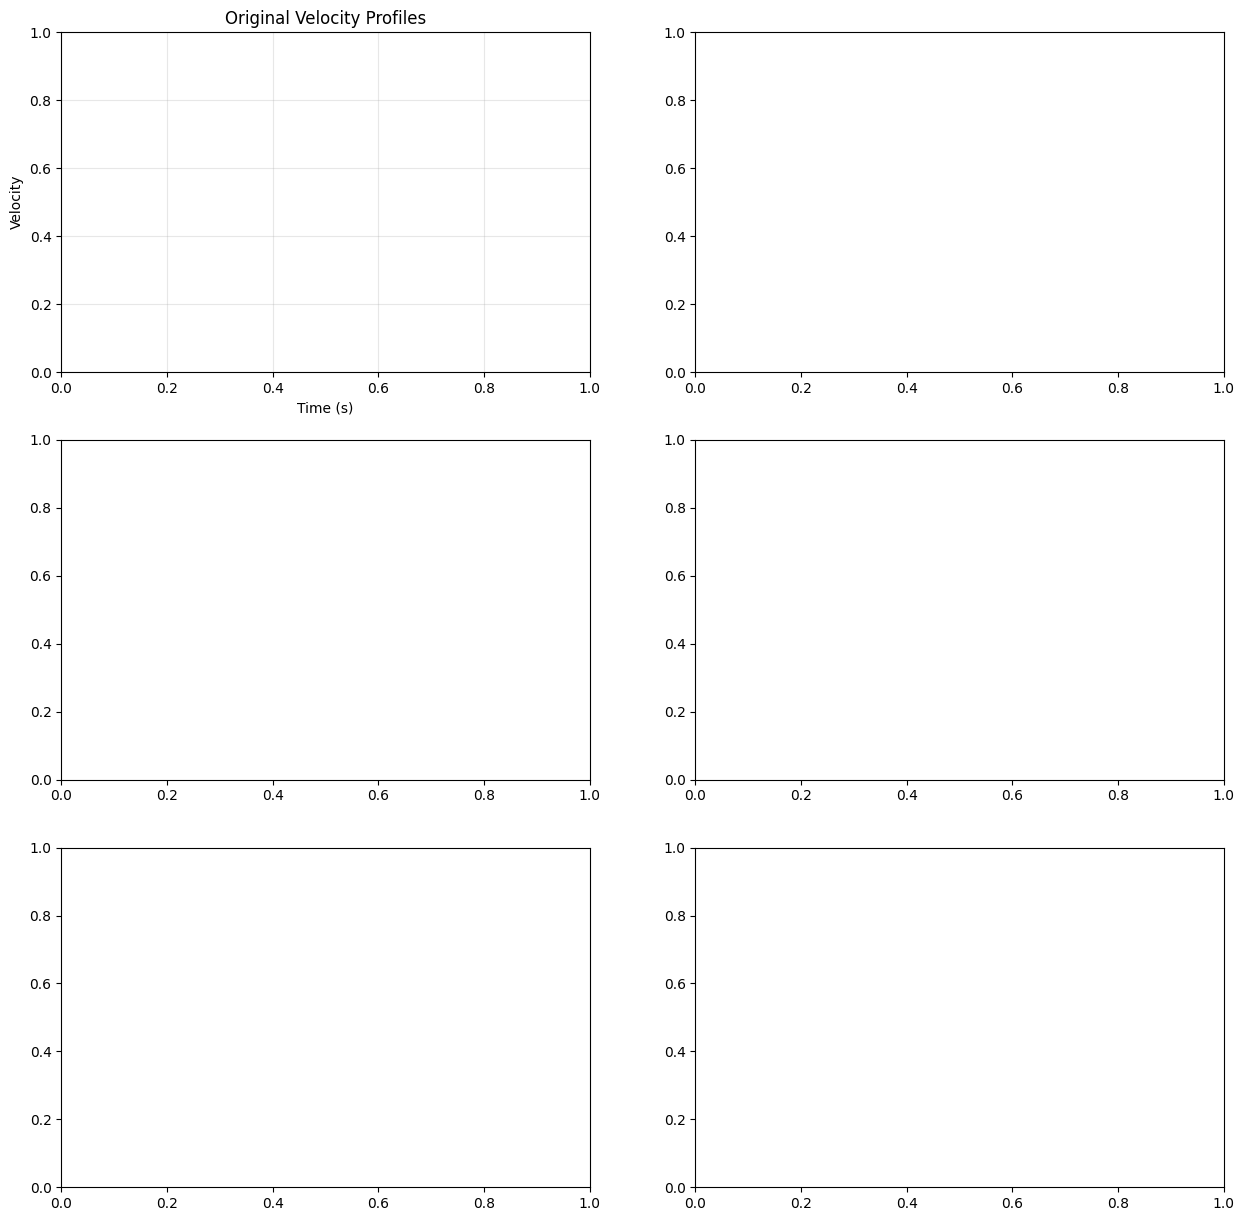

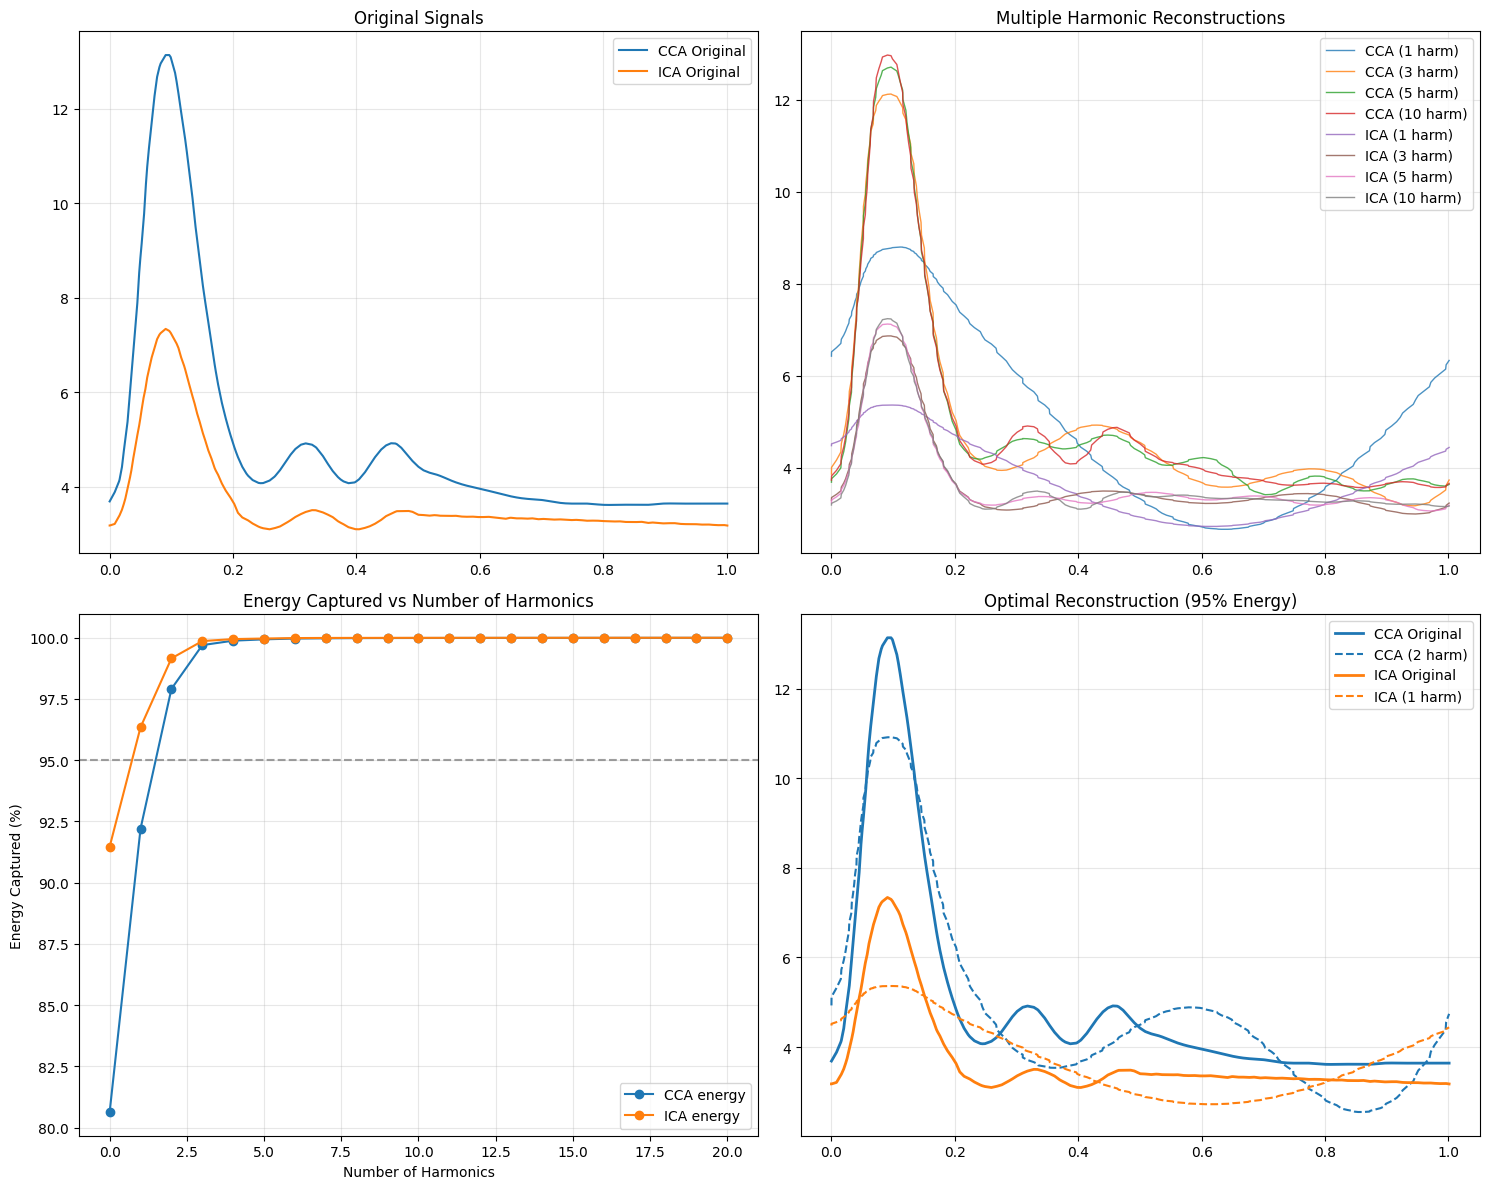

In [18]:
# Add this function to calculate energy contribution from harmonics
def analyze_harmonics(csv_path, max_harmonics=20):
    """Analyze how many harmonics are needed for accurate reconstruction"""
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: File '{csv_path}' not found.")
        return

    # Try to load the CSV with different delimiters
    try:
        # First try comma delimiter
        df = pd.read_csv(csv_path)
    except:
        try:
            # Try semicolon delimiter (common in some regions)
            df = pd.read_csv(csv_path, sep=';')
        except:
            try:
                # Try tab delimiter
                df = pd.read_csv(csv_path, sep='\t')
            except Exception as e:
                print(f"Error loading CSV: {e}")
                return

    print("CSV data loaded successfully.")
    print(f"Columns found: {df.columns.tolist()}")
    print(f"Data shape: {df.shape}")
    
    # Display first few rows to understand the data
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Extract time data
    x_col = df.columns[0]  # Time column
    
    # Calculate time step from the first two time points
    dt = df[x_col].iloc[1] - df[x_col].iloc[0]
    print(f"Time step (dt): {dt:.6f} seconds")
    
    # Calculate sampling frequency
    fs = 1/dt
    print(f"Sampling frequency: {fs:.2f} Hz")
    
    # Create figure with subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    
    # Plot original data
    axs[0, 0].set_title('Original Velocity Profiles')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Velocity')
    axs[0, 0].grid(True, alpha=0.3)
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    reconstructed_signals = {}
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    colors = ['#1f77b4', '#ff7f0e']
    
    for i, col in enumerate(df.columns[1:]):
        # Calculate FFT
        N = len(df[col])
        fft_complex = np.fft.fft(df[col])
        fft_vals = np.abs(fft_complex) / N
        freqs = np.fft.fftfreq(N, dt)
        
        # Get positive frequencies only
        positive_freq_idx = np.where(freqs > 0)
        freqs_pos = freqs[positive_freq_idx]
        fft_pos = fft_vals[positive_freq_idx]
        
        # Sort all frequencies by magnitude (not just peaks)
        sorted_indices = np.argsort(fft_pos)[::-1]
        
        # Calculate cumulative energy
        total_energy = np.sum(fft_pos**2)
        cumulative_energy = np.zeros(max_harmonics+1)
        reconstructions = {}
        
        # Plot original signal
        axs[0, 0].plot(df[x_col], df[col], label=f"{col} Original", color=colors[i])
        
        # Test multiple harmonic counts
        for h in range(max_harmonics+1):
            # Create filtered FFT
            filtered_fft = np.zeros_like(fft_complex, dtype=complex)
            
            # Always include the DC component
            dc_idx = np.argmin(np.abs(freqs))
            filtered_fft[dc_idx] = fft_complex[dc_idx]
            
            # Add h harmonics
            for j in range(min(h, len(sorted_indices))):
                idx = positive_freq_idx[0][sorted_indices[j]]
                filtered_fft[idx] = fft_complex[idx]
                
                # Add negative frequency counterpart
                neg_idx = N - idx if idx > 0 else 0
                if neg_idx != idx and neg_idx < N:
                    filtered_fft[neg_idx] = fft_complex[neg_idx]
            
            # Reconstruct
            harmonic_reconstruction = np.real(np.fft.ifft(filtered_fft))
            reconstructions[h] = harmonic_reconstruction
            
            # Calculate energy captured
            energy_captured = np.sum(np.abs(filtered_fft)**2) / np.sum(np.abs(fft_complex)**2)
            cumulative_energy[h] = energy_captured
            
            # Plot key reconstructions
            if h in [1, 3, 5, 10]:
                axs[0, 1].plot(df[x_col], harmonic_reconstruction, 
                             label=f"{col} ({h} harm)", 
                             linewidth=1, alpha=0.8)
        
        # Plot energy curve
        axs[1, 0].plot(range(max_harmonics+1), cumulative_energy*100, 
                     marker='o', label=f"{col} energy", color=colors[i])
        axs[1, 0].axhline(y=95, color='gray', linestyle='--', alpha=0.5)
        
        # Find how many harmonics needed for 95% energy
        harmonics_95 = np.argmax(cumulative_energy >= 0.95)
        if harmonics_95 == 0 and not np.any(cumulative_energy >= 0.95):
            harmonics_95 = max_harmonics
        
        print(f"{col}: {harmonics_95} harmonics needed for 95% energy reconstruction")
        
        # Plot original vs optimal reconstruction
        axs[1, 1].plot(df[x_col], df[col], label=f"{col} Original", 
                     color=colors[i], linewidth=2)
        axs[1, 1].plot(df[x_col], reconstructions[harmonics_95], 
                     label=f"{col} ({harmonics_95} harm)", 
                     color=colors[i], linestyle='--', linewidth=1.5)
    
    # Configure plots
    axs[0, 0].set_title('Original Signals')
    axs[0, 1].set_title('Multiple Harmonic Reconstructions')
    axs[1, 0].set_title('Energy Captured vs Number of Harmonics')
    axs[1, 0].set_xlabel('Number of Harmonics')
    axs[1, 0].set_ylabel('Energy Captured (%)')
    axs[1, 1].set_title('Optimal Reconstruction (95% Energy)')
    
    for ax in axs.flat:
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.tight_layout()
    plt.savefig('harmonic_analysis.png', dpi=300)
    plt.show()

analyze_harmonics(csv_file, max_harmonics=20)